## Notebook 1 - Alternate varying coverage
Data pulled from q-learning test with parameters:
- grid_size    25x25
- episodes     5000
- max_steps    10000
- alpha        0.1
- gamma        0.99
- epsilon      0.2
- obs_radius   Full, r=1 (3x3), r=2 (5x5)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load CSV files into DataFrames
df_r0 = pd.read_csv("../csvs/results_r0_25x25.csv")
df_r0["obs_radius"] = "Full"

df_r1 = pd.read_csv("../csvs/results_r1_25x25.csv")
df_r1["obs_radius"] = 1

df_r2 = pd.read_csv("../csvs/results_r2_25x25.csv")
df_r2["obs_radius"] = 2

In [8]:
# Concatenate the dataframe
df = pd.concat([df_r0, df_r1, df_r2], ignore_index=True)

df["coverage_ma"] = (
    df
    .groupby("obs_radius")["final_coverage"]
    .transform(lambda x: x.rolling(window=50, min_periods=1).mean())
)

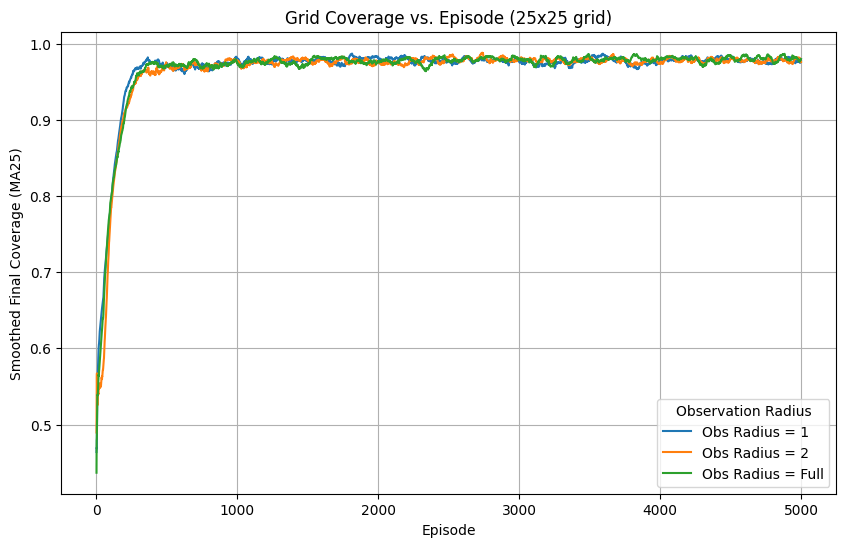

In [9]:
plt.figure(figsize=(10, 6))
for R, group in df.groupby("obs_radius"):
    plt.plot(
        group["episode"],
        group["coverage_ma"],
        label=f"Obs Radius = {R}"
    )

plt.xlabel("Episode")
plt.ylabel("Smoothed Final Coverage (MA25)")
plt.title("Grid Coverage vs. Episode (25x25 grid)")
plt.legend(title="Observation Radius")
plt.grid(True)
plt.show()

In [10]:
summary = (
    df[df['episode']==df['episode'].max()]
     .groupby('obs_radius')
     .agg({
         'coverage_time':'mean',
         'total_reward':'mean',
         'final_coverage':'mean'
     })
     .rename(columns={
         'coverage_time':'Avg Cov Time',
         'total_reward':'Avg Reward',
         'final_coverage':'Avg Final Cov'
     })
)
summary

,Avg Cov Time,Avg Reward,Avg Final Cov
obs_radius,,,
1,10000.0,578.0,0.9280
2,10000.0,619.0,0.9936
Full,10000.0,619.0,0.9936
